In [1]:
import os
import sys
import numpy as np
import copy
import scipy
from scipy import signal

from sklearn.decomposition import FastICA, PCA

sys.path.insert(0, "/home/anonymous/Desktop/eeg_sampling/modeling")
from dataio import readdata2, readlabels2, writedata
from datafilters import apply_dc_filter, apply_dwt_filter, apply_stfft_filter

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#DC Filter
enable_dc = True
dc_lowcut = 1.0
dc_highcut = 13.0
dc_order = 2
dc_type = "bandpass"
dc_func_type = "butter"

In [4]:
dataset = readdata2("./../curated/raw-samples")
labels = readlabels2("./../curated/raw-inputs")

#Constants
fs = 250.0 #Frequency in Hz
sample_time = dataset[0].shape[1]/fs #Total time for sample
num_rows = 480
num_channels = 8

In [5]:
dataset[0].flags['WRITEABLE'] = True
for i in range(0, 8):
    dataset[0][0,:,i] = apply_dc_filter(dataset[0][0,:,i], fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)

In [ ]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

#S /= np.linalg.norm(S)
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [ ]:
print(S)
print(A)
print(X)
plt.plot(X)

In [6]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

NameError: name 'X' is not defined

In [ ]:
print(S_)
print(A_)

In [ ]:
plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

[[ 0.58494866  0.24418908  0.16859081 ...,  0.26873899  0.30383098
   0.28954127]
 [ 0.6104334   0.25162736  0.16612293 ...,  0.27757517  0.31433108
   0.2991178 ]
 [ 0.63623619  0.25944355  0.16427127 ...,  0.28648493  0.32451698
   0.30890286]
 ..., 
 [ 1.03926587  0.97729033  0.95024079 ...,  0.92486459  0.97291642
   0.96269161]
 [ 0.90984887  0.85132849  0.82539988 ...,  0.80419928  0.84778857
   0.83910465]
 [ 0.77679145  0.72182262  0.69702798 ...,  0.67964208  0.71876478
   0.7117607 ]]


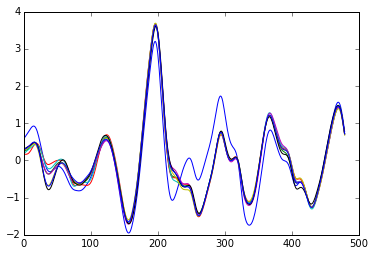

In [13]:
S = dataset[0][0,:,:]
#S = S/np.linalg.norm(S)
S /= S.std(axis=0)  # Standardize data
print(S)
plt.plot(S)

In [14]:
ica = FastICA(n_components=8)
S_ = ica.fit_transform(S)
A_ = ica.mixing_

[[-0.01314712 -0.03913516  0.00503142 ...,  0.023795    0.00556196
   0.00730189]
 [ 0.0002479  -0.03905137 -0.00491446 ...,  0.01797688  0.00491803
   0.01469228]
 [ 0.01287086 -0.03887538 -0.01424027 ...,  0.01230124  0.00426687
   0.02204596]
 ..., 
 [-0.00627924 -0.00448904  0.00120719 ...,  0.03333183  0.01187974
   0.03557018]
 [-0.00631882 -0.00551357  0.00294293 ...,  0.0300407   0.01110177
   0.03260208]
 [-0.00657579 -0.00650615  0.00511525 ...,  0.02679099  0.01047965
   0.02972595]]


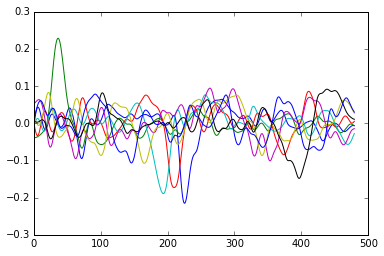

In [15]:
print(S_)
plt.plot(S_)